Description

Old Faithful Geyser Data

Description: (From R manual):

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

     A data frame with 272 observations on 2 variables.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

     Hardle, W. (1991) Smoothing Techniques with Implementation in S.
     New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
     Old Faithful geyser. Applied Statistics 39, 357-365.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('erruptions.xlsx')

In [4]:
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [5]:
df.isnull().sum()

Unnamed: 0    0
eruptions     0
waiting       0
dtype: int64

Text(0, 0.5, 'waiting time to next erruption')

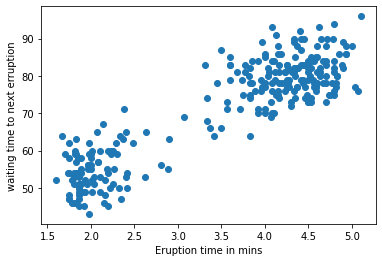

In [10]:
plt.scatter(x = df['eruptions'], y= df['waiting'])
plt.xlabel('Eruption time in mins')
plt.ylabel('waiting time to next erruption')

In [13]:
df = df.drop('Unnamed: 0', axis = 1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_std = scaler.fit_transform(df)

In [60]:
X = pd.DataFrame(X_std, columns = df.columns)

# Model

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km.fit(X)

KMeans(n_clusters=2)

In [29]:
centroids = km.cluster_centers_
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

In [34]:
km.inertia_

79.57595948827701

In [31]:
km.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

In [32]:
X['labels'] = km.labels_

In [42]:
X

,eruptions,waiting,labels
0,0.098499,0.597123,1
1,-1.481459,-1.245181,0
2,-0.135861,0.228663,1
3,-1.057503,-0.655644,0
4,0.917443,1.039277,1
...,...,...,...
267,0.552298,0.744508,1
268,-1.174245,-1.834719,0
269,0.815624,1.407737,1
270,-1.466537,-1.834719,0


Text(0, 0.5, 'waiting time to next erruption')

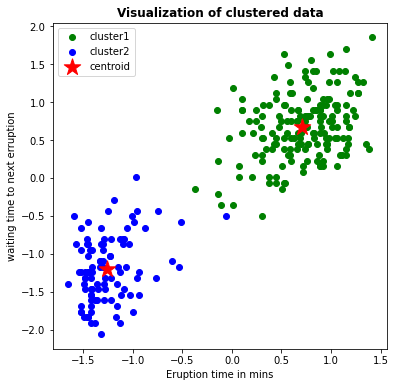

In [55]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(x = X[X['labels']==1]['eruptions'],c ='green', y = X[X['labels']==1]['waiting'], label = 'cluster1')
plt.scatter(x = X[X['labels']==0]['eruptions'],c ='blue', y = X[X['labels']==0]['waiting'], label = 'cluster2')
plt.scatter(x = centroids[:,0], y = centroids[:,1], marker= '*', s = 300, c ='red', label = 'centroid')
plt.legend()
plt.title('Visualization of clustered data', fontweight = 'bold')
plt.xlabel('Eruption time in mins')
plt.ylabel('waiting time to next erruption')

# Determining K

In [61]:
inertia = []

list_k = list(range(1,10))

for n in list_k:
    km = KMeans(n_clusters = n)
    km.fit(X)
    inertia.append(km.inertia_)


C:\Users\enoch\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

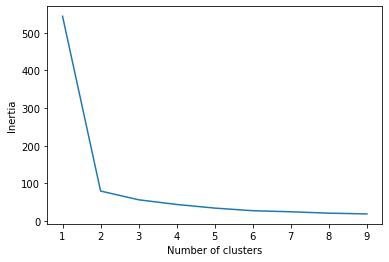

In [64]:
plt.plot(list_k, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')